<a href="https://colab.research.google.com/github/simoncardenas2002/Redes-Neuronales/blob/master/red_con_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

 ### Primero se crea el conjunto de datos 

In [ ]:
N=1000
gaussian_quantiles=make_gaussian_quantiles(mean=None,cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)
X,Y = gaussian_quantiles

In [ ]:
X.shape

(1000, 2)

In [ ]:
Y=Y[:,np.newaxis]

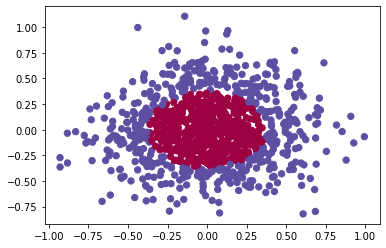

In [ ]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0],s=40,cmap=plt.cm.Spectral)

In [ ]:
# Agregaremos las funciones de activación
def sigmoid(x,derivate=False):
  if derivate:
    return np.exp(-x)/((np.exp(-x)+1)**2)
  else:
    return 1/(1+np.exp(-x))

def relu(x,derivate=True):
  if derivate:
    x[x<=0]=0
    x[x>0]=1
    return x
  else:
    return np.maximum(0,x)

In [ ]:
# Agregamos la funcion de perdida

def mse(y,y_hat,derivate=False):
  if derivate:
    return(y_hat - y)
  else:
    return np.mean((y_hat-y)**2)


### Crearemos la estructura de la red

In [23]:
def inicializar_parameters_deep(layers_dim):
  parameters={}
  L=len(layers_dim)
  for l in range(0,L-1):
    parameters["W"+str(l+1)]=(np.random.rand(layers_dim[l],layers_dim[l+1])*2)-1
    parameters["b"+str(l+1)]=(np.random.rand(1,layers_dim[l+1])*2)-1
  return parameters

    

In [24]:
layer_dims=[2,4,8,1]
params=inicializar_parameters_deep(layer_dims)

In [25]:
params


{'W1': array([[ 0.06713928,  0.7155327 ,  0.96902864, -0.09499884],
        [-0.59839037, -0.20047244, -0.59212692, -0.3395623 ]]),
 'b1': array([[-0.76100045,  0.85149965,  0.27392489, -0.85794209]]),
 'W2': array([[-0.44695211,  0.58244397, -0.08482507,  0.42661025,  0.3231784 ,
          0.99240375, -0.10737686, -0.49465202],
        [ 0.47338103,  0.04358233,  0.31614153, -0.28668637,  0.58496067,
          0.94273615, -0.03889781, -0.9072052 ],
        [ 0.20997571,  0.47211494,  0.44345955,  0.12921535,  0.90082627,
         -0.94169312,  0.98305956, -0.52422814],
        [-0.52909497,  0.05422898,  0.77912113, -0.70385239,  0.09838327,
         -0.36513089, -0.54372224, -0.02254963]]),
 'b2': array([[-0.11309571,  0.50187349, -0.0659054 , -0.12946866, -0.58207156,
          0.36977953,  0.49852733, -0.35156217]]),
 'W3': array([[-0.54282745],
        [-0.776169  ],
        [ 0.95434997],
        [-0.78226332],
        [-0.29927301],
        [ 0.74357687],
        [-0.09525979],


In [26]:
params["W1"].shape

(2, 4)

In [27]:
X.shape

(1000, 2)

In [28]:
#Haremos producto punto 
np.matmul(X,params["W1"])

array([[ 0.15711646,  0.23772143,  0.39651966,  0.05361194],
       [ 0.02672388, -0.15848386, -0.19162012,  0.04732082],
       [-0.04803643, -0.31930982, -0.44243305,  0.03097376],
       ...,
       [ 0.30491187,  0.41806877,  0.71316066,  0.11235349],
       [ 0.36512238,  0.18485702,  0.44274268,  0.19518258],
       [-0.02305099, -0.02684431, -0.04771328, -0.00940818]])

In [29]:
np.matmul(X,params["W1"]).shape

(1000, 4)

In [37]:
params["b1"].shape


(1, 4)

In [31]:
params
params["A0"] =X

params["Z1"]=np.matmul(params["A0"],params["W1"])+params["b1"]
params["A1"]=relu(params["Z1"])

params["Z2"]=np.matmul(params["A1"],params["W2"])+params["b2"]
params["A2"]=relu(params["Z2"])

params["Z3"]=np.matmul(params["A2"],params["W3"])+params["b3"]
params["A3"]=sigmoid(params["Z3"])

output=params["A3"]

In [39]:
output

array([[0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.64820923],
       [0.648